In [284]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [285]:
df =  pd.read_excel("DoeEIAT.xlsx")
np.random.seed(1)
tf.random.set_seed(1)

In [286]:
print(df)

    C_CTAB  V_CTAB  C*Vctab  C_HAuCl4*3H2O  V_HAuCl4*3H2O  C*Vhau  C_AgNO3   
0       50   10000   500000            100             50    5000    100.0  \
1       50   10000   500000            100             50    5000    100.0   
2      100   10000  1000000              1            100     100      0.6   
3       50   10000   500000             25             50    1250     10.0   
4       50   10000   500000             25             50    1250     10.0   
5       50   10000   500000             25            100    2500     10.0   
6       50   10000   500000             25            150    3750     10.0   
7       50   10000   500000             25            200    5000     10.0   
8       50   10000   500000             25            100    2500     10.0   
9       50   10000   500000             50            100    5000     20.0   
10      50   10000   500000             50            100    5000     20.0   
11      50   10000   500000             50            100    500

In [287]:
X = df[["C_CTAB","V_CTAB","C*Vctab","C_HAuCl4*3H2O","V_HAuCl4*3H2O","C*Vhau","C_AgNO3", "V_AgNO3","C*Vag","C_HCl","C*VHCL", "V_HCl","D_Extracto","V_Extracto","C*VE","C_NaBH4","V_NaBH4","C*Vna"]].values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = df['LSPR'].values.reshape(-1,1)


In [288]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 1)

In [289]:
# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 1)

In [290]:
import keras
import keras.backend as kb
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Dense(8, activation = tf.nn.relu,  kernel_initializer=keras.initializers.RandomUniform(seed=-7)),
    keras.layers.Dense(8, activation = tf.nn.relu,  kernel_initializer=keras.initializers.RandomUniform(seed=1)),
    keras.layers.Dense(1,  kernel_initializer=keras.initializers.RandomUniform(seed=1))
])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.02)

model.compile(loss = "mean_squared_error",
              optimizer = optimizer,
              metrics = ["mean_absolute_error", "mean_squared_error"]
)

In [291]:
# Entrenar el modelo con los datos de entrenamiento y validación
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, batch_size=3)


Epoch 1/1000
8/8 [==============================] - 2s 62ms/step - loss: 538594.0625 - mean_absolute_error: 731.9581 - mean_squared_error: 538594.0625 - val_loss: 448402.9688 - val_mean_absolute_error: 668.9039 - val_mean_squared_error: 448402.9688
Epoch 2/1000
8/8 [==============================] - 0s 11ms/step - loss: 516880.3750 - mean_absolute_error: 717.0654 - mean_squared_error: 516880.3750 - val_loss: 415617.0000 - val_mean_absolute_error: 643.9288 - val_mean_squared_error: 415617.0000
Epoch 3/1000
8/8 [==============================] - 0s 11ms/step - loss: 469913.0000 - mean_absolute_error: 683.5320 - mean_squared_error: 469913.0000 - val_loss: 361182.4062 - val_mean_absolute_error: 600.1564 - val_mean_squared_error: 361182.4062
Epoch 4/1000
8/8 [==============================] - 0s 11ms/step - loss: 400616.3750 - mean_absolute_error: 631.0217 - mean_squared_error: 400616.3750 - val_loss: 293166.9375 - val_mean_absolute_error: 540.4749 - val_mean_squared_error: 293166.9375
Epoc

Epoch 35/1000
8/8 [==============================] - 0s 12ms/step - loss: 3758.3296 - mean_absolute_error: 49.2718 - mean_squared_error: 3758.3296 - val_loss: 3059.9910 - val_mean_absolute_error: 49.6586 - val_mean_squared_error: 3059.9910
Epoch 36/1000
8/8 [==============================] - 0s 11ms/step - loss: 3572.8486 - mean_absolute_error: 52.0979 - mean_squared_error: 3572.8486 - val_loss: 3797.2937 - val_mean_absolute_error: 52.9178 - val_mean_squared_error: 3797.2932
Epoch 37/1000
8/8 [==============================] - 0s 11ms/step - loss: 3208.6501 - mean_absolute_error: 46.3385 - mean_squared_error: 3208.6501 - val_loss: 2167.7112 - val_mean_absolute_error: 41.5010 - val_mean_squared_error: 2167.7112
Epoch 38/1000
8/8 [==============================] - 0s 11ms/step - loss: 3539.9939 - mean_absolute_error: 47.9057 - mean_squared_error: 3539.9939 - val_loss: 2628.3816 - val_mean_absolute_error: 47.1760 - val_mean_squared_error: 2628.3816
Epoch 39/1000
8/8 [=====================

8/8 [==============================] - 0s 7ms/step - loss: 2265.9417 - mean_absolute_error: 37.6003 - mean_squared_error: 2265.9417 - val_loss: 7326.5962 - val_mean_absolute_error: 77.3602 - val_mean_squared_error: 7326.5962
Epoch 70/1000
8/8 [==============================] - 0s 7ms/step - loss: 2292.1265 - mean_absolute_error: 37.8228 - mean_squared_error: 2292.1265 - val_loss: 4028.9314 - val_mean_absolute_error: 57.3997 - val_mean_squared_error: 4028.9314
Epoch 71/1000
8/8 [==============================] - 0s 6ms/step - loss: 2440.0276 - mean_absolute_error: 40.6393 - mean_squared_error: 2440.0276 - val_loss: 3387.5344 - val_mean_absolute_error: 53.1045 - val_mean_squared_error: 3387.5342
Epoch 72/1000
8/8 [==============================] - 0s 7ms/step - loss: 2023.2905 - mean_absolute_error: 35.3968 - mean_squared_error: 2023.2905 - val_loss: 2566.7512 - val_mean_absolute_error: 39.9212 - val_mean_squared_error: 2566.7512
Epoch 73/1000
8/8 [==============================] - 0s 7m

8/8 [==============================] - 0s 7ms/step - loss: 1679.4625 - mean_absolute_error: 35.8310 - mean_squared_error: 1679.4625 - val_loss: 3808.8933 - val_mean_absolute_error: 57.2066 - val_mean_squared_error: 3808.8933
Epoch 104/1000
8/8 [==============================] - 0s 6ms/step - loss: 1406.4448 - mean_absolute_error: 30.1631 - mean_squared_error: 1406.4448 - val_loss: 3598.0598 - val_mean_absolute_error: 55.1904 - val_mean_squared_error: 3598.0598
Epoch 105/1000
8/8 [==============================] - 0s 6ms/step - loss: 1380.0770 - mean_absolute_error: 30.1164 - mean_squared_error: 1380.0770 - val_loss: 2762.7668 - val_mean_absolute_error: 47.1373 - val_mean_squared_error: 2762.7668
Epoch 106/1000
8/8 [==============================] - 0s 6ms/step - loss: 1764.1309 - mean_absolute_error: 35.5185 - mean_squared_error: 1764.1309 - val_loss: 2461.8386 - val_mean_absolute_error: 41.4599 - val_mean_squared_error: 2461.8386
Epoch 107/1000
8/8 [==============================] - 0

8/8 [==============================] - 0s 6ms/step - loss: 973.2801 - mean_absolute_error: 24.3538 - mean_squared_error: 973.2801 - val_loss: 2244.7896 - val_mean_absolute_error: 38.8441 - val_mean_squared_error: 2244.7896
Epoch 138/1000
8/8 [==============================] - 0s 7ms/step - loss: 1286.0311 - mean_absolute_error: 29.1099 - mean_squared_error: 1286.0311 - val_loss: 6136.1699 - val_mean_absolute_error: 72.3234 - val_mean_squared_error: 6136.1699
Epoch 139/1000
8/8 [==============================] - 0s 8ms/step - loss: 1263.0089 - mean_absolute_error: 30.9172 - mean_squared_error: 1263.0089 - val_loss: 2279.8098 - val_mean_absolute_error: 36.4843 - val_mean_squared_error: 2279.8098
Epoch 140/1000
8/8 [==============================] - 0s 8ms/step - loss: 1174.0820 - mean_absolute_error: 30.2183 - mean_squared_error: 1174.0820 - val_loss: 5106.2544 - val_mean_absolute_error: 66.2337 - val_mean_squared_error: 5106.2544
Epoch 141/1000
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 8ms/step - loss: 1339.9999 - mean_absolute_error: 29.2784 - mean_squared_error: 1339.9999 - val_loss: 2171.5808 - val_mean_absolute_error: 38.1388 - val_mean_squared_error: 2171.5808
Epoch 172/1000
8/8 [==============================] - 0s 8ms/step - loss: 1008.9559 - mean_absolute_error: 25.0079 - mean_squared_error: 1008.9559 - val_loss: 3504.7722 - val_mean_absolute_error: 54.0411 - val_mean_squared_error: 3504.7722
Epoch 173/1000
8/8 [==============================] - 0s 8ms/step - loss: 936.8788 - mean_absolute_error: 24.9989 - mean_squared_error: 936.8788 - val_loss: 4002.8967 - val_mean_absolute_error: 58.2230 - val_mean_squared_error: 4002.8967
Epoch 174/1000
8/8 [==============================] - 0s 8ms/step - loss: 857.3704 - mean_absolute_error: 24.7063 - mean_squared_error: 857.3704 - val_loss: 2434.0027 - val_mean_absolute_error: 36.4932 - val_mean_squared_error: 2434.0027
Epoch 175/1000
8/8 [==============================] - 0s 8m

8/8 [==============================] - 0s 9ms/step - loss: 1007.8740 - mean_absolute_error: 24.1499 - mean_squared_error: 1007.8740 - val_loss: 2778.2686 - val_mean_absolute_error: 46.0187 - val_mean_squared_error: 2778.2686
Epoch 206/1000
8/8 [==============================] - 0s 11ms/step - loss: 962.1783 - mean_absolute_error: 21.8883 - mean_squared_error: 962.1783 - val_loss: 2209.6248 - val_mean_absolute_error: 40.0860 - val_mean_squared_error: 2209.6248
Epoch 207/1000
8/8 [==============================] - 0s 8ms/step - loss: 947.1146 - mean_absolute_error: 23.9948 - mean_squared_error: 947.1146 - val_loss: 2653.3970 - val_mean_absolute_error: 44.0629 - val_mean_squared_error: 2653.3970
Epoch 208/1000
8/8 [==============================] - 0s 9ms/step - loss: 1070.3929 - mean_absolute_error: 23.7343 - mean_squared_error: 1070.3929 - val_loss: 2307.6204 - val_mean_absolute_error: 41.2262 - val_mean_squared_error: 2307.6204
Epoch 209/1000
8/8 [==============================] - 0s 9

8/8 [==============================] - 0s 7ms/step - loss: 943.1623 - mean_absolute_error: 23.7655 - mean_squared_error: 943.1623 - val_loss: 3951.2773 - val_mean_absolute_error: 57.1285 - val_mean_squared_error: 3951.2773
Epoch 240/1000
8/8 [==============================] - 0s 7ms/step - loss: 917.4560 - mean_absolute_error: 21.7223 - mean_squared_error: 917.4560 - val_loss: 2529.7285 - val_mean_absolute_error: 39.6205 - val_mean_squared_error: 2529.7285
Epoch 241/1000
8/8 [==============================] - 0s 7ms/step - loss: 1322.6451 - mean_absolute_error: 27.1641 - mean_squared_error: 1322.6451 - val_loss: 3176.2473 - val_mean_absolute_error: 49.5276 - val_mean_squared_error: 3176.2473
Epoch 242/1000
8/8 [==============================] - 0s 15ms/step - loss: 952.1445 - mean_absolute_error: 22.4152 - mean_squared_error: 952.1443 - val_loss: 3622.3376 - val_mean_absolute_error: 54.2129 - val_mean_squared_error: 3622.3376
Epoch 243/1000
8/8 [==============================] - 0s 10m

8/8 [==============================] - 0s 9ms/step - loss: 1392.8727 - mean_absolute_error: 28.5969 - mean_squared_error: 1392.8727 - val_loss: 6938.5806 - val_mean_absolute_error: 73.8493 - val_mean_squared_error: 6938.5806
Epoch 274/1000
8/8 [==============================] - 0s 11ms/step - loss: 1350.6454 - mean_absolute_error: 27.6426 - mean_squared_error: 1350.6454 - val_loss: 3088.8625 - val_mean_absolute_error: 47.5013 - val_mean_squared_error: 3088.8625
Epoch 275/1000
8/8 [==============================] - 0s 9ms/step - loss: 833.4481 - mean_absolute_error: 23.0671 - mean_squared_error: 833.4481 - val_loss: 3019.8555 - val_mean_absolute_error: 47.0664 - val_mean_squared_error: 3019.8555
Epoch 276/1000
8/8 [==============================] - 0s 11ms/step - loss: 1037.4961 - mean_absolute_error: 25.6996 - mean_squared_error: 1037.4961 - val_loss: 2132.4995 - val_mean_absolute_error: 39.0537 - val_mean_squared_error: 2132.4993
Epoch 277/1000
8/8 [==============================] - 0

8/8 [==============================] - 0s 9ms/step - loss: 1151.3075 - mean_absolute_error: 29.6711 - mean_squared_error: 1151.3075 - val_loss: 2266.9602 - val_mean_absolute_error: 39.6372 - val_mean_squared_error: 2266.9602
Epoch 308/1000
8/8 [==============================] - 0s 9ms/step - loss: 847.9669 - mean_absolute_error: 22.0740 - mean_squared_error: 847.9669 - val_loss: 2517.2229 - val_mean_absolute_error: 41.8356 - val_mean_squared_error: 2517.2229
Epoch 309/1000
8/8 [==============================] - 0s 8ms/step - loss: 1028.9806 - mean_absolute_error: 23.4001 - mean_squared_error: 1028.9806 - val_loss: 2463.7288 - val_mean_absolute_error: 40.1520 - val_mean_squared_error: 2463.7288
Epoch 310/1000
8/8 [==============================] - 0s 9ms/step - loss: 931.6272 - mean_absolute_error: 24.9820 - mean_squared_error: 931.6272 - val_loss: 4246.6367 - val_mean_absolute_error: 58.8185 - val_mean_squared_error: 4246.6362
Epoch 311/1000
8/8 [==============================] - 0s 8m

8/8 [==============================] - 0s 7ms/step - loss: 927.2597 - mean_absolute_error: 22.0030 - mean_squared_error: 927.2597 - val_loss: 2578.4014 - val_mean_absolute_error: 42.2842 - val_mean_squared_error: 2578.4014
Epoch 342/1000
8/8 [==============================] - 0s 7ms/step - loss: 1011.7881 - mean_absolute_error: 24.7424 - mean_squared_error: 1011.7881 - val_loss: 7062.5376 - val_mean_absolute_error: 75.7145 - val_mean_squared_error: 7062.5376
Epoch 343/1000
8/8 [==============================] - 0s 8ms/step - loss: 943.3419 - mean_absolute_error: 24.6214 - mean_squared_error: 943.3419 - val_loss: 7735.8086 - val_mean_absolute_error: 79.8416 - val_mean_squared_error: 7735.8086
Epoch 344/1000
8/8 [==============================] - 0s 7ms/step - loss: 1318.9843 - mean_absolute_error: 27.2468 - mean_squared_error: 1318.9843 - val_loss: 3359.3430 - val_mean_absolute_error: 50.6923 - val_mean_squared_error: 3359.3430
Epoch 345/1000
8/8 [==============================] - 0s 7m

8/8 [==============================] - 0s 9ms/step - loss: 900.5240 - mean_absolute_error: 21.8293 - mean_squared_error: 900.5240 - val_loss: 4780.1562 - val_mean_absolute_error: 62.5382 - val_mean_squared_error: 4780.1562
Epoch 376/1000
8/8 [==============================] - 0s 7ms/step - loss: 1133.8109 - mean_absolute_error: 27.6914 - mean_squared_error: 1133.8109 - val_loss: 5670.3477 - val_mean_absolute_error: 68.4822 - val_mean_squared_error: 5670.3477
Epoch 377/1000
8/8 [==============================] - 0s 7ms/step - loss: 1021.9832 - mean_absolute_error: 26.3802 - mean_squared_error: 1021.9832 - val_loss: 3185.5789 - val_mean_absolute_error: 48.9339 - val_mean_squared_error: 3185.5789
Epoch 378/1000
8/8 [==============================] - 0s 7ms/step - loss: 975.3376 - mean_absolute_error: 23.1758 - mean_squared_error: 975.3376 - val_loss: 3461.7363 - val_mean_absolute_error: 52.0763 - val_mean_squared_error: 3461.7363
Epoch 379/1000
8/8 [==============================] - 0s 7m

8/8 [==============================] - 0s 9ms/step - loss: 856.9932 - mean_absolute_error: 23.8609 - mean_squared_error: 856.9932 - val_loss: 5320.8457 - val_mean_absolute_error: 66.7431 - val_mean_squared_error: 5320.8457
Epoch 410/1000
8/8 [==============================] - 0s 9ms/step - loss: 746.5557 - mean_absolute_error: 22.9945 - mean_squared_error: 746.5557 - val_loss: 2299.1013 - val_mean_absolute_error: 40.3466 - val_mean_squared_error: 2299.1013
Epoch 411/1000
8/8 [==============================] - 0s 8ms/step - loss: 1085.1398 - mean_absolute_error: 25.4539 - mean_squared_error: 1085.1398 - val_loss: 2552.8777 - val_mean_absolute_error: 42.7324 - val_mean_squared_error: 2552.8777
Epoch 412/1000
8/8 [==============================] - 0s 10ms/step - loss: 676.8188 - mean_absolute_error: 21.5185 - mean_squared_error: 676.8188 - val_loss: 3895.2375 - val_mean_absolute_error: 55.9119 - val_mean_squared_error: 3895.2375
Epoch 413/1000
8/8 [==============================] - 0s 8ms

8/8 [==============================] - 0s 8ms/step - loss: 700.9894 - mean_absolute_error: 20.4593 - mean_squared_error: 700.9894 - val_loss: 3283.2351 - val_mean_absolute_error: 50.3263 - val_mean_squared_error: 3283.2351
Epoch 444/1000
8/8 [==============================] - 0s 9ms/step - loss: 826.9662 - mean_absolute_error: 21.4979 - mean_squared_error: 826.9662 - val_loss: 5385.2075 - val_mean_absolute_error: 65.7723 - val_mean_squared_error: 5385.2075
Epoch 445/1000
8/8 [==============================] - 0s 8ms/step - loss: 933.5543 - mean_absolute_error: 24.3840 - mean_squared_error: 933.5543 - val_loss: 3230.8201 - val_mean_absolute_error: 49.7579 - val_mean_squared_error: 3230.8201
Epoch 446/1000
8/8 [==============================] - 0s 9ms/step - loss: 974.3443 - mean_absolute_error: 24.9255 - mean_squared_error: 974.3443 - val_loss: 2437.0693 - val_mean_absolute_error: 41.8328 - val_mean_squared_error: 2437.0693
Epoch 447/1000
8/8 [==============================] - 0s 8ms/st

8/8 [==============================] - 0s 6ms/step - loss: 835.9080 - mean_absolute_error: 22.7782 - mean_squared_error: 835.9080 - val_loss: 3924.6047 - val_mean_absolute_error: 55.6037 - val_mean_squared_error: 3924.6047
Epoch 478/1000
8/8 [==============================] - 0s 7ms/step - loss: 985.4669 - mean_absolute_error: 25.6114 - mean_squared_error: 985.4668 - val_loss: 2966.7258 - val_mean_absolute_error: 46.5841 - val_mean_squared_error: 2966.7258
Epoch 479/1000
8/8 [==============================] - 0s 6ms/step - loss: 919.2585 - mean_absolute_error: 23.5156 - mean_squared_error: 919.2585 - val_loss: 4391.9692 - val_mean_absolute_error: 59.5999 - val_mean_squared_error: 4391.9692
Epoch 480/1000
8/8 [==============================] - 0s 7ms/step - loss: 825.4219 - mean_absolute_error: 22.1082 - mean_squared_error: 825.4219 - val_loss: 3070.6328 - val_mean_absolute_error: 47.8475 - val_mean_squared_error: 3070.6328
Epoch 481/1000
8/8 [==============================] - 0s 7ms/st

8/8 [==============================] - 0s 6ms/step - loss: 758.1103 - mean_absolute_error: 22.5712 - mean_squared_error: 758.1103 - val_loss: 2368.6289 - val_mean_absolute_error: 39.7579 - val_mean_squared_error: 2368.6289
Epoch 512/1000
8/8 [==============================] - 0s 6ms/step - loss: 1230.3540 - mean_absolute_error: 28.5800 - mean_squared_error: 1230.3540 - val_loss: 2080.0632 - val_mean_absolute_error: 38.5202 - val_mean_squared_error: 2080.0632
Epoch 513/1000
8/8 [==============================] - 0s 6ms/step - loss: 942.4951 - mean_absolute_error: 24.3548 - mean_squared_error: 942.4951 - val_loss: 2581.5166 - val_mean_absolute_error: 42.8929 - val_mean_squared_error: 2581.5166
Epoch 514/1000
8/8 [==============================] - 0s 7ms/step - loss: 1089.9679 - mean_absolute_error: 25.9437 - mean_squared_error: 1089.9679 - val_loss: 2843.4426 - val_mean_absolute_error: 45.3359 - val_mean_squared_error: 2843.4426
Epoch 515/1000
8/8 [==============================] - 0s 6m

8/8 [==============================] - 0s 9ms/step - loss: 840.5761 - mean_absolute_error: 21.4459 - mean_squared_error: 840.5761 - val_loss: 3258.3723 - val_mean_absolute_error: 49.5580 - val_mean_squared_error: 3258.3723
Epoch 546/1000
8/8 [==============================] - 0s 10ms/step - loss: 1303.0547 - mean_absolute_error: 28.5203 - mean_squared_error: 1303.0547 - val_loss: 2878.0129 - val_mean_absolute_error: 45.1821 - val_mean_squared_error: 2878.0129
Epoch 547/1000
8/8 [==============================] - 0s 11ms/step - loss: 593.8479 - mean_absolute_error: 18.7473 - mean_squared_error: 593.8479 - val_loss: 2298.2058 - val_mean_absolute_error: 39.9027 - val_mean_squared_error: 2298.2058
Epoch 548/1000
8/8 [==============================] - 0s 9ms/step - loss: 996.1505 - mean_absolute_error: 25.3502 - mean_squared_error: 996.1504 - val_loss: 3690.6741 - val_mean_absolute_error: 53.6144 - val_mean_squared_error: 3690.6741
Epoch 549/1000
8/8 [==============================] - 0s 10

8/8 [==============================] - 0s 9ms/step - loss: 850.9351 - mean_absolute_error: 23.7658 - mean_squared_error: 850.9351 - val_loss: 2375.1018 - val_mean_absolute_error: 40.2145 - val_mean_squared_error: 2375.1016
Epoch 580/1000
8/8 [==============================] - 0s 8ms/step - loss: 841.3610 - mean_absolute_error: 22.9850 - mean_squared_error: 841.3610 - val_loss: 3492.8496 - val_mean_absolute_error: 52.1290 - val_mean_squared_error: 3492.8496
Epoch 581/1000
8/8 [==============================] - 0s 8ms/step - loss: 904.9069 - mean_absolute_error: 21.0896 - mean_squared_error: 904.9069 - val_loss: 3188.3562 - val_mean_absolute_error: 48.8845 - val_mean_squared_error: 3188.3562
Epoch 582/1000
8/8 [==============================] - 0s 10ms/step - loss: 1272.9938 - mean_absolute_error: 28.6965 - mean_squared_error: 1272.9938 - val_loss: 5231.3574 - val_mean_absolute_error: 65.8928 - val_mean_squared_error: 5231.3574
Epoch 583/1000
8/8 [==============================] - 0s 8ms

8/8 [==============================] - 0s 7ms/step - loss: 881.9415 - mean_absolute_error: 24.9281 - mean_squared_error: 881.9414 - val_loss: 4063.2285 - val_mean_absolute_error: 57.4875 - val_mean_squared_error: 4063.2285
Epoch 614/1000
8/8 [==============================] - 0s 7ms/step - loss: 775.0938 - mean_absolute_error: 23.1945 - mean_squared_error: 775.0938 - val_loss: 4107.2104 - val_mean_absolute_error: 57.5723 - val_mean_squared_error: 4107.2104
Epoch 615/1000
8/8 [==============================] - 0s 7ms/step - loss: 896.8592 - mean_absolute_error: 23.2892 - mean_squared_error: 896.8592 - val_loss: 3041.1570 - val_mean_absolute_error: 47.5333 - val_mean_squared_error: 3041.1570
Epoch 616/1000
8/8 [==============================] - 0s 7ms/step - loss: 1230.1338 - mean_absolute_error: 25.9025 - mean_squared_error: 1230.1338 - val_loss: 2319.0361 - val_mean_absolute_error: 39.5191 - val_mean_squared_error: 2319.0361
Epoch 617/1000
8/8 [==============================] - 0s 7ms/

8/8 [==============================] - 0s 7ms/step - loss: 1105.4081 - mean_absolute_error: 26.7081 - mean_squared_error: 1105.4081 - val_loss: 2761.1475 - val_mean_absolute_error: 44.5639 - val_mean_squared_error: 2761.1475
Epoch 648/1000
8/8 [==============================] - 0s 7ms/step - loss: 876.9707 - mean_absolute_error: 23.0893 - mean_squared_error: 876.9707 - val_loss: 2799.6787 - val_mean_absolute_error: 44.9753 - val_mean_squared_error: 2799.6787
Epoch 649/1000
8/8 [==============================] - 0s 6ms/step - loss: 834.7414 - mean_absolute_error: 23.6184 - mean_squared_error: 834.7414 - val_loss: 2298.2454 - val_mean_absolute_error: 40.2881 - val_mean_squared_error: 2298.2454
Epoch 650/1000
8/8 [==============================] - 0s 7ms/step - loss: 757.5433 - mean_absolute_error: 21.8712 - mean_squared_error: 757.5433 - val_loss: 3553.5234 - val_mean_absolute_error: 52.8465 - val_mean_squared_error: 3553.5234
Epoch 651/1000
8/8 [==============================] - 0s 7ms/

8/8 [==============================] - 0s 9ms/step - loss: 711.9575 - mean_absolute_error: 20.7002 - mean_squared_error: 711.9575 - val_loss: 2412.0432 - val_mean_absolute_error: 40.5192 - val_mean_squared_error: 2412.0432
Epoch 682/1000
8/8 [==============================] - 0s 9ms/step - loss: 1201.4355 - mean_absolute_error: 28.0162 - mean_squared_error: 1201.4357 - val_loss: 3247.8826 - val_mean_absolute_error: 49.3750 - val_mean_squared_error: 3247.8821
Epoch 683/1000
8/8 [==============================] - 0s 8ms/step - loss: 1194.0582 - mean_absolute_error: 26.2020 - mean_squared_error: 1194.0582 - val_loss: 2495.4502 - val_mean_absolute_error: 41.8991 - val_mean_squared_error: 2495.4502
Epoch 684/1000
8/8 [==============================] - 0s 8ms/step - loss: 936.6035 - mean_absolute_error: 22.8946 - mean_squared_error: 936.6035 - val_loss: 2294.6064 - val_mean_absolute_error: 39.8090 - val_mean_squared_error: 2294.6064
Epoch 685/1000
8/8 [==============================] - 0s 8m

8/8 [==============================] - 0s 9ms/step - loss: 790.1525 - mean_absolute_error: 21.3171 - mean_squared_error: 790.1525 - val_loss: 3136.4558 - val_mean_absolute_error: 48.4295 - val_mean_squared_error: 3136.4558
Epoch 716/1000
8/8 [==============================] - 0s 8ms/step - loss: 993.6960 - mean_absolute_error: 24.1184 - mean_squared_error: 993.6960 - val_loss: 3251.4990 - val_mean_absolute_error: 49.6317 - val_mean_squared_error: 3251.4990
Epoch 717/1000
8/8 [==============================] - 0s 8ms/step - loss: 998.5570 - mean_absolute_error: 23.5615 - mean_squared_error: 998.5570 - val_loss: 3747.3828 - val_mean_absolute_error: 53.7149 - val_mean_squared_error: 3747.3828
Epoch 718/1000
8/8 [==============================] - 0s 9ms/step - loss: 968.4756 - mean_absolute_error: 27.1899 - mean_squared_error: 968.4754 - val_loss: 3549.7351 - val_mean_absolute_error: 52.0456 - val_mean_squared_error: 3549.7351
Epoch 719/1000
8/8 [==============================] - 0s 8ms/st

8/8 [==============================] - 0s 8ms/step - loss: 1319.9941 - mean_absolute_error: 26.4913 - mean_squared_error: 1319.9941 - val_loss: 2648.6584 - val_mean_absolute_error: 43.4864 - val_mean_squared_error: 2648.6584
Epoch 750/1000
8/8 [==============================] - 0s 7ms/step - loss: 944.3212 - mean_absolute_error: 25.4959 - mean_squared_error: 944.3212 - val_loss: 3630.7415 - val_mean_absolute_error: 52.5158 - val_mean_squared_error: 3630.7415
Epoch 751/1000
8/8 [==============================] - 0s 7ms/step - loss: 778.8549 - mean_absolute_error: 22.1822 - mean_squared_error: 778.8549 - val_loss: 3170.4675 - val_mean_absolute_error: 48.3738 - val_mean_squared_error: 3170.4675
Epoch 752/1000
8/8 [==============================] - 0s 7ms/step - loss: 603.5935 - mean_absolute_error: 19.4222 - mean_squared_error: 603.5935 - val_loss: 2160.3098 - val_mean_absolute_error: 39.2264 - val_mean_squared_error: 2160.3098
Epoch 753/1000
8/8 [==============================] - 0s 8ms/

8/8 [==============================] - 0s 10ms/step - loss: 1179.5757 - mean_absolute_error: 29.3107 - mean_squared_error: 1179.5756 - val_loss: 2421.4712 - val_mean_absolute_error: 40.4860 - val_mean_squared_error: 2421.4712
Epoch 784/1000
8/8 [==============================] - 0s 8ms/step - loss: 760.1152 - mean_absolute_error: 23.8968 - mean_squared_error: 760.1152 - val_loss: 3168.7615 - val_mean_absolute_error: 48.5549 - val_mean_squared_error: 3168.7615
Epoch 785/1000
8/8 [==============================] - 0s 20ms/step - loss: 937.5023 - mean_absolute_error: 23.9695 - mean_squared_error: 937.5023 - val_loss: 2800.0830 - val_mean_absolute_error: 44.3522 - val_mean_squared_error: 2800.0830
Epoch 786/1000
8/8 [==============================] - 0s 10ms/step - loss: 1050.7479 - mean_absolute_error: 26.8625 - mean_squared_error: 1050.7479 - val_loss: 2930.4709 - val_mean_absolute_error: 45.6842 - val_mean_squared_error: 2930.4709
Epoch 787/1000
8/8 [==============================] - 0s

8/8 [==============================] - 0s 9ms/step - loss: 1000.1070 - mean_absolute_error: 24.9659 - mean_squared_error: 1000.1070 - val_loss: 5663.8984 - val_mean_absolute_error: 67.9180 - val_mean_squared_error: 5663.8984
Epoch 818/1000
8/8 [==============================] - 0s 8ms/step - loss: 862.4006 - mean_absolute_error: 20.3652 - mean_squared_error: 862.4006 - val_loss: 2908.4583 - val_mean_absolute_error: 45.4211 - val_mean_squared_error: 2908.4583
Epoch 819/1000
8/8 [==============================] - 0s 9ms/step - loss: 873.7391 - mean_absolute_error: 23.9005 - mean_squared_error: 873.7391 - val_loss: 4623.0229 - val_mean_absolute_error: 61.1287 - val_mean_squared_error: 4623.0229
Epoch 820/1000
8/8 [==============================] - 0s 9ms/step - loss: 1076.7638 - mean_absolute_error: 25.8748 - mean_squared_error: 1076.7638 - val_loss: 2472.0139 - val_mean_absolute_error: 41.4609 - val_mean_squared_error: 2472.0139
Epoch 821/1000
8/8 [==============================] - 0s 9m

8/8 [==============================] - 0s 9ms/step - loss: 841.6186 - mean_absolute_error: 24.0630 - mean_squared_error: 841.6187 - val_loss: 8059.0249 - val_mean_absolute_error: 78.3292 - val_mean_squared_error: 8059.0249
Epoch 852/1000
8/8 [==============================] - 0s 7ms/step - loss: 1442.8330 - mean_absolute_error: 29.1391 - mean_squared_error: 1442.8330 - val_loss: 2896.6750 - val_mean_absolute_error: 45.0594 - val_mean_squared_error: 2896.6750
Epoch 853/1000
8/8 [==============================] - 0s 7ms/step - loss: 870.1729 - mean_absolute_error: 24.8922 - mean_squared_error: 870.1729 - val_loss: 4287.0029 - val_mean_absolute_error: 58.1731 - val_mean_squared_error: 4287.0029
Epoch 854/1000
8/8 [==============================] - 0s 6ms/step - loss: 640.7389 - mean_absolute_error: 18.9770 - mean_squared_error: 640.7389 - val_loss: 7393.3813 - val_mean_absolute_error: 76.3078 - val_mean_squared_error: 7393.3813
Epoch 855/1000
8/8 [==============================] - 0s 7ms/

8/8 [==============================] - 0s 6ms/step - loss: 821.9594 - mean_absolute_error: 23.1308 - mean_squared_error: 821.9592 - val_loss: 2447.3589 - val_mean_absolute_error: 41.8011 - val_mean_squared_error: 2447.3589
Epoch 886/1000
8/8 [==============================] - 0s 7ms/step - loss: 689.4088 - mean_absolute_error: 19.4022 - mean_squared_error: 689.4088 - val_loss: 2477.0662 - val_mean_absolute_error: 42.0855 - val_mean_squared_error: 2477.0662
Epoch 887/1000
8/8 [==============================] - 0s 7ms/step - loss: 862.9932 - mean_absolute_error: 23.9775 - mean_squared_error: 862.9932 - val_loss: 4987.4165 - val_mean_absolute_error: 63.3451 - val_mean_squared_error: 4987.4165
Epoch 888/1000
8/8 [==============================] - 0s 7ms/step - loss: 1165.5173 - mean_absolute_error: 25.2424 - mean_squared_error: 1165.5175 - val_loss: 2346.3572 - val_mean_absolute_error: 40.3514 - val_mean_squared_error: 2346.3572
Epoch 889/1000
8/8 [==============================] - 0s 7ms/

8/8 [==============================] - 0s 7ms/step - loss: 873.0051 - mean_absolute_error: 22.7370 - mean_squared_error: 873.0051 - val_loss: 6202.2988 - val_mean_absolute_error: 69.5522 - val_mean_squared_error: 6202.2983
Epoch 920/1000
8/8 [==============================] - 0s 7ms/step - loss: 1283.1323 - mean_absolute_error: 28.1544 - mean_squared_error: 1283.1323 - val_loss: 4223.5796 - val_mean_absolute_error: 57.5385 - val_mean_squared_error: 4223.5796
Epoch 921/1000
8/8 [==============================] - 0s 7ms/step - loss: 835.8024 - mean_absolute_error: 21.8366 - mean_squared_error: 835.8024 - val_loss: 2284.7349 - val_mean_absolute_error: 40.1263 - val_mean_squared_error: 2284.7346
Epoch 922/1000
8/8 [==============================] - 0s 7ms/step - loss: 971.0561 - mean_absolute_error: 25.4464 - mean_squared_error: 971.0561 - val_loss: 2218.2795 - val_mean_absolute_error: 39.5607 - val_mean_squared_error: 2218.2795
Epoch 923/1000
8/8 [==============================] - 0s 8ms/

8/8 [==============================] - 0s 9ms/step - loss: 993.9483 - mean_absolute_error: 24.7857 - mean_squared_error: 993.9483 - val_loss: 3520.9128 - val_mean_absolute_error: 51.7220 - val_mean_squared_error: 3520.9128
Epoch 954/1000
8/8 [==============================] - 0s 9ms/step - loss: 870.6689 - mean_absolute_error: 23.1889 - mean_squared_error: 870.6689 - val_loss: 4853.2544 - val_mean_absolute_error: 62.0562 - val_mean_squared_error: 4853.2544
Epoch 955/1000
8/8 [==============================] - 0s 9ms/step - loss: 1093.4022 - mean_absolute_error: 26.4467 - mean_squared_error: 1093.4022 - val_loss: 5057.2603 - val_mean_absolute_error: 63.6806 - val_mean_squared_error: 5057.2603
Epoch 956/1000
8/8 [==============================] - 0s 8ms/step - loss: 954.9131 - mean_absolute_error: 24.4793 - mean_squared_error: 954.9131 - val_loss: 2369.5110 - val_mean_absolute_error: 40.6408 - val_mean_squared_error: 2369.5110
Epoch 957/1000
8/8 [==============================] - 0s 8ms/

8/8 [==============================] - 0s 10ms/step - loss: 799.4309 - mean_absolute_error: 21.4086 - mean_squared_error: 799.4309 - val_loss: 4447.3774 - val_mean_absolute_error: 58.7297 - val_mean_squared_error: 4447.3774
Epoch 988/1000
8/8 [==============================] - 0s 8ms/step - loss: 1081.5238 - mean_absolute_error: 27.4028 - mean_squared_error: 1081.5238 - val_loss: 2226.6946 - val_mean_absolute_error: 39.5905 - val_mean_squared_error: 2226.6943
Epoch 989/1000
8/8 [==============================] - 0s 12ms/step - loss: 1284.5199 - mean_absolute_error: 29.4668 - mean_squared_error: 1284.5199 - val_loss: 2571.4773 - val_mean_absolute_error: 43.0303 - val_mean_squared_error: 2571.4773
Epoch 990/1000
8/8 [==============================] - 0s 10ms/step - loss: 671.5588 - mean_absolute_error: 18.8148 - mean_squared_error: 671.5588 - val_loss: 2388.9563 - val_mean_absolute_error: 40.7698 - val_mean_squared_error: 2388.9563
Epoch 991/1000
8/8 [==============================] - 0s

In [292]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

1/1 [==============================] - 0s 89ms/step
[[720.4847 ]
 [780.24713]
 [778.476  ]
 [690.5721 ]
 [739.13885]
 [719.4703 ]
 [778.476  ]
 [798.14465]]
[[716]
 [809]
 [776]
 [680]
 [752]
 [714]
 [774]
 [791]]


In [293]:
# Evaluar el rendimiento del modelo en el conjunto de prueba
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

153.894139574375


Text(0, 0.5, 'Ypred')

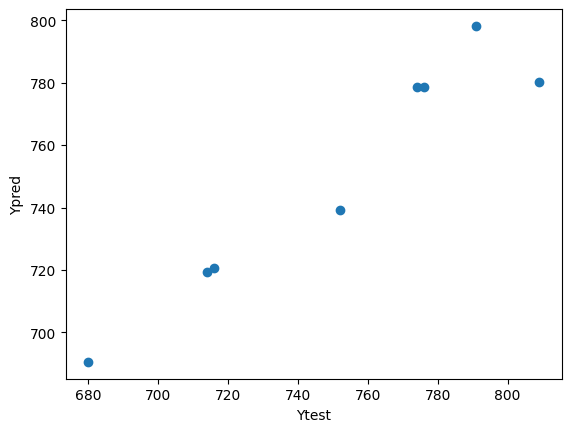

In [294]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Ytest")
plt.ylabel("Ypred")

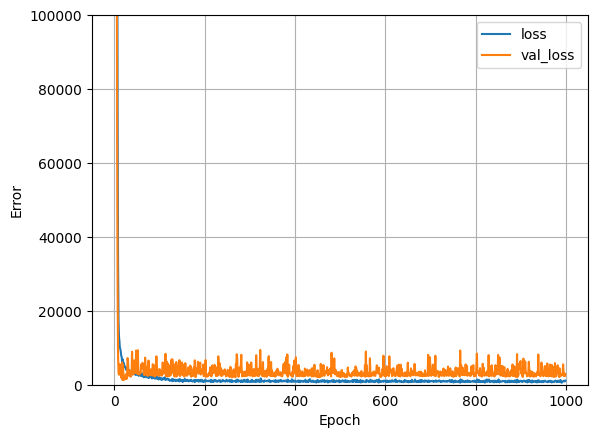

In [295]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100000])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
  
plot_loss(history)